# A4: Solving nonlinear equations in 1d II

- Complete the following and submit to Canvas before Oct 1 11:59PM,
- Late work will recieve 0%,
- Each assignment is worth the same, 
- Please get in contact with the instructor in plenty of time if you need help,
- Before submitting your work, make sure to check everything runs as expected. Click **Kernel > Restart Kernel and Run All Cells**.
- Feel free to add more cells to experiment or test your answers,
- I encourage you to discuss the course material and assignment questions with your classmates. However, unless otherwise explicitly stated on the assignment, you must complete and write up your solutions on your own,
- The use of GenAI is prohibited as outlined in the course syllabus. If I suspect you of cheating, you may be asked to complete a written or oral exam on the content of this assignment,
- ✍ indicates a question where a mathematical proof is required
- 💻 indicates a question where numerical experiments are required 

<div class="alert alert-info">
Enter your name here: YOUR NAME HERE  

Approximate time spent on this assignment: .......
</div>

<div class="alert alert-block alert-danger"> 
    ⚠ Do not edit the following cell. You may find some of these functions useful
</div>

In [1]:
using Plots
using LaTeXStrings

function relaxation( f, λ, x1; N=100, tol=1e-10)
    x = [x1]
    r = 0.;
    for n in 2:N
        push!( x, x[n-1] - λ*f(x[n-1]) )
        r = abs(f(x[end]));
        if (r < tol)
            return x
        end
    end
    @warn "max interations |f| = $r";
    return x
end

function Newton( f, f_prime, x1; N=100, tol=1e-10)
    x = [x1]
    r = 0;
    for n in 2:N
        push!( x, x[n-1] - f(x[n-1])/f_prime(x[n-1]) )
        r = abs(f(x[end]));
        if (r < tol)
            return x
        end
    end
    @warn "max interations |f| = $r";
    return x
end

# asymptotic rate of convergence
function μ( x, ξ; α=1 )
    return @. abs( x[2:end] - ξ ) / ( abs(x[1:end-1] - ξ )^α );
end 

ϵ = 1.;
f = ψ -> ψ - ϵ * sin(ψ) - 2π; # has a zero at 2π
ξ = 2π

6.283185307179586

Recall that Newton's Method is given by the iteration $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$. This method is guaranteed to converge under the following conditions:

<div class='alert alert-block alert-info'><b>Theorem.</b> 

Suppose $f: [a,b] \to \mathbb R$ is twice continuously differentiable with $f(\xi) = 0$ and $f'(\xi) \not= 0$ for some $\xi \in [a,b]$. Further suppose that 

\begin{align}
    \left|\frac{f''(x)}{f'(y)}\right| \leq A
\end{align}

for all $x,y \in [a,b]$. Then, the Newton iteration $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$ converges at least quadratically to $\xi$ for all $x_1 \in [a,b]$ such that $|x_1 - \xi| \leq A^{-1}$.

</div> 

Each of the following parts is worth **25 pts**.

## A. Repeated Roots

Suppose that $f(\xi) = f'(\xi) = 0$ (so that the above theorem is not applicable) and that there exists $0 < m < M < 2m$ such that $m < |f''(x)| < M$ for all $x \in [\xi-\delta, \xi+\delta]$. 

1. ✍ Show that there exists $\eta_n, \theta_n$ between $x_n$ and $\xi$ such that the sequence generated by Newton's method ($x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$) satisfies

\begin{align}
    x_{n+1} - \xi &= \frac{1}{2} \frac{f''(\eta_n)}{f'(x_n)} (x_n - \xi)^2  \nonumber\\
    %
    &= - \frac{1}{2} \frac{f''(\eta_n)}{f''(\theta_n)} (x_n - \xi).
\end{align}

2. ✍ Hence show that Newton's method converges at least linearly in this case. 
3. 💻 Verify this numerically by finding the zero of $f(x) = (x-1)^2$ and estimating the asymptotic error constant $\mu$.
4. ✍ Show that $g(x) := \frac{f(x)}{f'(x)}$ is a function such that $g(\xi) = \xi$ but $g'(\xi) \not= 0$. Explain why this may be useful in practice.

## B. Kepler's Equation

In lectures, we considered the equation 

\begin{align}
    f(\psi) := \psi - \epsilon \sin \psi - 2\pi = 0
\end{align}

with $\epsilon = 0.9$. Recall that we showed that the Relaxation Method ($x_{n+1} = x_n - \lambda f(x_n)$) converged linearly with asymptotic error constant $\left| 1 - 0.1 \lambda \right|$ and Newton's Method converged faster than quadratically. For the remainder of this question, fix $\epsilon = 1$. Here's a plot of $f$:

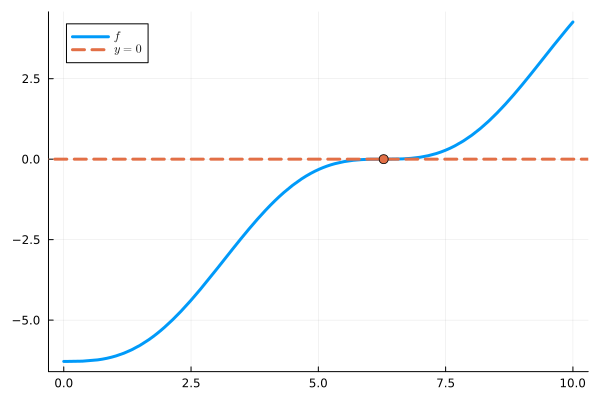

In [2]:
plot( f, 0, 10, label=L"f", lw=3 )
hline!( [0] , linestyle=:dash, lw = 3, label=L"y=0")
scatter!( [ξ], [f(ξ)], markersize=5, primary=false )

1. ✍ Show that $2\pi$ is the unique solution to $f = 0$.
2. 💻 Show numerically that the relaxation method converges for some choice of $\lambda$. What is the order of convergence of this method?
3. 💻 Show numerically that Newton's method converges. What is the order of convergence?
4. ✍ Compare your answers to this question to the $\epsilon = 0.9$ case. Why is the convergence slower/faster?

## C. Newton's Method Examples

1. 💻 Run Newton's Method on the following functions (it may help to plot the functions in order to choose a good initial point $x_1$)

\begin{align}
    f(x) &= x^3 - 2x^2 - 5 \nonumber\\
    g(x) &= e^x - x - 1     \nonumber\\
    h(x) &= \frac{x}{1+x^2} \nonumber\\ 
    j(x) &= \sqrt[3]{x}
\end{align}

2. 💻 If the iteration converges, what is the (numerically calculated) order of convergence? 
3. ✍ In each case, explain why your observations do not contradict the Theorem stated above and do not contradict your observations made in part A.

## D. Research Task

Find a research paper explaining a method named after one of the following people: Halley, Householder, Osada, Ostrowski, Steffensen, Traub. What is the main novelty of this method? How does it (claim to) improve upon previous methods in the literature? Implement your chosen method and test it on a function of your choice. 

Please clearly cite which paper you are describing.